In [1]:
#!/usr/bin/env python2
# -*- coding: utf-8 -*-
"""
Created on Thu Jan 18 17:03:18 2018
@author: anandkadumberi
"""
#%% Import required libraries
import cv2
import os
import numpy as np
import tensorflow as tf
import random
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

/home/anandpreshob/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/anandpreshob/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#%% Read the training data paths
data_dir='/home/anandpreshob/kaggle/nucleus'
train_dir=os.path.join(data_dir,'stage1_train')
label_csv=os.path.join(data_dir,'stage1_train_labels.csv')

IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS=256,256,3

nuc_img_files=os.listdir(train_dir)
#%% Read image path
x_images,y_images=[],[]
for files in nuc_img_files:
    img_path=os.path.join(train_dir,files,'images',files+'.png')
    img=cv2.imread(img_path)
    x_images.append(cv2.resize(img,(IMG_HEIGHT,IMG_WIDTH)))
    mask_filename=os.path.join(train_dir,files,'images',files+'_mask.png')
    mask=cv2.imread(mask_filename)
    mask=cv2.resize(mask,(IMG_HEIGHT,IMG_WIDTH))
    y_images.append(cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY))
x_images=np.asarray(x_images)
y_images=np.asarray(y_images)

In [3]:
# Train Validation Split
x_train, y_train, x_val, y_val= x_images[0:500], y_images[0:500], x_images[500:], y_images[500:]

In [4]:
print len(x_train)
print len(x_val)

500
170


In [5]:
#%% Test Data
test_dir='/home/anandpreshob/kaggle/nucleus/stage1_test'
test_files=os.listdir(test_dir)

In [6]:
#random.randint(0,170)
#def return_tes
test_img=cv2.imread(os.path.join(test_dir,test_files[10],'images',test_files[10]+'.png'))
test_img=cv2.resize(test_img,(IMG_HEIGHT,IMG_WIDTH))

Text(0.5,1,u'Mask')

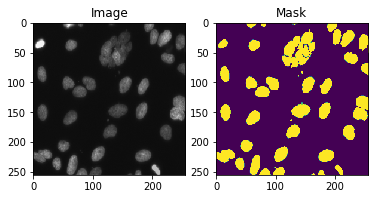

In [7]:
# Plot the images and test
fig = plt.figure()
a=fig.add_subplot(1,2,1)
imgplot = plt.imshow(x_images[100])
a.set_title('Image')
a=fig.add_subplot(1,2,2)
imgplot = plt.imshow(y_images[100])
a.set_title('Mask')

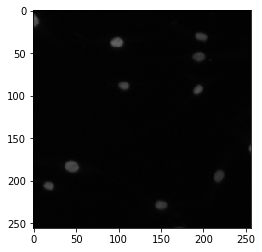

In [8]:
plt.imshow(test_img)

In [9]:
#%%Tensorflow unet
def get_variable(name,shape):
    return tf.get_variable(name, shape, initializer = tf.contrib.layers.xavier_initializer())

def UNet(X):
    ### Unit 1 ###
    with tf.name_scope('Unit1'):
        W1_1 =   get_variable("W1_1", [3,3,3,16] )
        Z1 = tf.nn.conv2d(X,W1_1, strides = [1,1,1,1], padding = 'SAME')
        A1 = tf.nn.relu(Z1)
        W1_2 =   get_variable("W1_2", [3,3,16,16] )
        Z2 = tf.nn.conv2d(A1,W1_2, strides = [1,1,1,1], padding = 'SAME')
        A2 = tf.nn.relu(Z2) 
        P1 = tf.nn.max_pool(A2, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')
    ### Unit 2 ###
    with tf.name_scope('Unit2'):
        W2_1 =   get_variable("W2_1", [3,3,16,32] )
        Z3 = tf.nn.conv2d(P1,W2_1, strides = [1,1,1,1], padding = 'SAME')
        A3 = tf.nn.relu(Z3)
        W2_2 =   get_variable("W2_2", [3,3,32,32] )
        Z4 = tf.nn.conv2d(A3,W2_2, strides = [1,1,1,1], padding = 'SAME')
        A4 = tf.nn.relu(Z4) 
        P2 = tf.nn.max_pool(A4, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')
    ### Unit 3 ###
    with tf.name_scope('Unit3'):
        W3_1 =   get_variable("W3_1", [3,3,32,64] )
        Z5 = tf.nn.conv2d(P2,W3_1, strides = [1,1,1,1], padding = 'SAME')
        A5 = tf.nn.relu(Z5)
        W3_2 =   get_variable("W3_2", [3,3,64,64] )
        Z6 = tf.nn.conv2d(A5,W3_2, strides = [1,1,1,1], padding = 'SAME')
        A6 = tf.nn.relu(Z6) 
        P3 = tf.nn.max_pool(A6, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')
    ### Unit 4 ###
    with tf.name_scope('Unit4'):
        W4_1 =   get_variable("W4_1", [3,3,64,128] )
        Z7 = tf.nn.conv2d(P3,W4_1, strides = [1,1,1,1], padding = 'SAME')
        A7 = tf.nn.relu(Z7)
        W4_2 =   get_variable("W4_2", [3,3,128,128] )
        Z8 = tf.nn.conv2d(A7,W4_2, strides = [1,1,1,1], padding = 'SAME')
        A8 = tf.nn.relu(Z8) 
        P4 = tf.nn.max_pool(A8, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')
    ### Unit 5 ###
    with tf.name_scope('Unit5'):
        W5_1 =   get_variable("W5_1", [3,3,128,256] )
        Z9 = tf.nn.conv2d(P4,W5_1, strides = [1,1,1,1], padding = 'SAME')
        A9 = tf.nn.relu(Z9)
        W5_2 =   get_variable("W5_2", [3,3,256,256] )
        Z10 = tf.nn.conv2d(A9,W5_2, strides = [1,1,1,1], padding = 'SAME')
        A10 = tf.nn.relu(Z10) 
    ### Unit 6 ###
    with tf.name_scope('Unit6'):
        W6_1 =   get_variable("W6_1", [3,3,256,128] )
        U1 = tf.layers.conv2d_transpose(A10, filters = 128, kernel_size = 2, strides = 2, padding = 'SAME')
        U1 = tf.concat([U1, A8],3)
        W6_2 =   get_variable("W6_2", [3,3,128,128] )
        Z11 = tf.nn.conv2d(U1,W6_1, strides = [1,1,1,1], padding = 'SAME')
        A11 = tf.nn.relu(Z11)
        Z12 = tf.nn.conv2d(A11,W6_2, strides = [1,1,1,1], padding = 'SAME')
        A12 = tf.nn.relu(Z12)
    ### Unit 7 ###
    with tf.name_scope('Unit7'):
        W7_1 =   get_variable("W7_1", [3,3,128,64] )
        U2 = tf.layers.conv2d_transpose(A12, filters = 64, kernel_size = 2, strides = 2, padding = 'SAME')
        U2 = tf.concat([U2, A6],3)
        Z13 = tf.nn.conv2d(U2,W7_1, strides = [1,1,1,1], padding = 'SAME')
        A13 = tf.nn.relu(Z13)
        W7_2 =   get_variable("W7_2", [3,3,64,64] )
        Z14 = tf.nn.conv2d(A13,W7_2, strides = [1,1,1,1], padding = 'SAME')
        A14 = tf.nn.relu(Z14)
    ### Unit 8 ###
    with tf.name_scope('Unit8'):
        W8_1 =   get_variable("W8_1", [3,3,64,32] )
        U3 = tf.layers.conv2d_transpose(A14, filters = 32, kernel_size = 2, strides = 2, padding = 'SAME')
        U3 = tf.concat([U3, A4],3)
        Z15 = tf.nn.conv2d(U3,W8_1, strides = [1,1,1,1], padding = 'SAME')
        A15 = tf.nn.relu(Z15)
        W8_2 =   get_variable("W8_2", [3,3,32,32] )
        Z16 = tf.nn.conv2d(A15,W8_2, strides = [1,1,1,1], padding = 'SAME')
        A16 = tf.nn.relu(Z16)
    ### Unit 9 ###
    with tf.name_scope('Unit9'):
        W9_1 =   get_variable("W9_1", [3,3,32,16] )
        U4 = tf.layers.conv2d_transpose(A16, filters = 16, kernel_size = 2, strides = 2, padding = 'SAME')
        U4 = tf.concat([U4, A2],3)
        Z17 = tf.nn.conv2d(U4,W9_1, strides = [1,1,1,1], padding = 'SAME')
        A17 = tf.nn.relu(Z17)
        W9_2 =   get_variable("W9_2", [3,3,16,16] )
        Z18 = tf.nn.conv2d(A17,W9_2, strides = [1,1,1,1], padding = 'SAME')
        A18 = tf.nn.relu(Z18)
    ### Unit 10 ###
    with tf.name_scope('out_put'):
        W10 =    get_variable("W10", [1,1,16,1] )
        Z19 = tf.nn.conv2d(A18,W10, strides = [1,1,1,1], padding = 'SAME')
        A19 = tf.nn.sigmoid(Z19)
        Y_pred = A19
    return Y_pred

def loss_function(y_pred, y_true):
    cost = tf.reduce_mean(tf.keras.losses.binary_crossentropy(y_true,y_pred))
    return cost

def mean_iou(y_pred,y_true):
    y_pred_ = tf.to_int64(y_pred > 0.5)
    y_true_ = tf.to_int64(y_true > 0.5)
    score, up_opt = tf.metrics.mean_iou(y_true_, y_pred_, 2)
    with tf.control_dependencies([up_opt]):
        score = tf.identity(score)
    return score
def IOU_(y_pred, y_true):
    """Returns a (approx) IOU score
    intesection = y_pred.flatten() * y_true.flatten()
    Then, IOU = 2 * intersection / (y_pred.sum() + y_true.sum() + 1e-7) + 1e-7
    Args:
        y_pred (4-D array): (N, H, W, 1)
        y_true (4-D array): (N, H, W, 1)
    Returns:
        float: IOU score
    """
    H, W, _ = y_pred.get_shape().as_list()[1:]

    pred_flat = tf.reshape(y_pred, [-1, H * W])
    true_flat = tf.reshape(y_true, [-1, H * W])

    intersection = tf.reduce_sum(pred_flat * true_flat, axis=1) + 1e-7 # there was a 2 * initially
    denominator = tf.reduce_sum(
        pred_flat, axis=1) + tf.reduce_sum(
            true_flat, axis=1) + 1e-7

    return tf.reduce_mean(intersection / denominator)
#%%
with tf.device("/gpu:0"):
    x_ = tf.placeholder(tf.float32, shape=(None,IMG_HEIGHT, IMG_WIDTH, 3))
    y_ = tf.placeholder(tf.float32, shape=(None,IMG_HEIGHT, IMG_WIDTH, 1))
    y_pred = UNet(x_)
    loss = loss_function(y_pred,y_)
    new_loss=1-IOU_(y_pred,y_)
with tf.device("/cpu:0"):
    iou = IOU_(y_pred,y_)


In [10]:
def get_batch(x,y,batch_size):
    x_tensor=tf.constant(x)
    y_tensor=tf.reshape(y,[-1,IMG_HEIGHT,IMG_WIDTH,1])
    dataset=tf.data.Dataset.from_tensor_slices((x_tensor,y_tensor))
    batched_dataset=dataset.batch(batch_size)
    iterator= batched_dataset.make_one_shot_iterator()
    return iterator

In [11]:
optimizer=tf.train.AdamOptimizer(
    learning_rate=0.001,
    beta1=0.9,
    beta2=0.999,
    epsilon=1e-08,
    use_locking=False,
    name='Adam'
)
train= optimizer.minimize(new_loss)

In [12]:
init=tf.global_variables_initializer()

epoch: 0
training: 0
mean iou is 0.0849022716284
epoch: 0
training: 200
mean iou is 0.928213655949
epoch: 1
training: 0
mean iou is 0.930380344391
epoch: 1
training: 200
mean iou is 0.930682659149
epoch: 2
training: 0
mean iou is 0.931246697903
epoch: 2
training: 200
mean iou is 0.931255578995
epoch: 3
training: 0
mean iou is 0.931273579597
epoch: 3
training: 200
mean iou is 0.931279182434
epoch: 4
training: 0
mean iou is 0.931292116642
epoch: 4
training: 200
mean iou is 0.931283652782
epoch: 5
training: 0
mean iou is 0.931559145451
epoch: 5
training: 200
mean iou is 0.931869029999
epoch: 6
training: 0
mean iou is 0.934739887714
epoch: 6
training: 200
mean iou is 0.935817837715
epoch: 7
training: 0
mean iou is 0.935467362404
epoch: 7
training: 200
mean iou is 0.936366379261
epoch: 8
training: 0
mean iou is 0.936620295048
epoch: 8
training: 200
mean iou is 0.936885595322
epoch: 9
training: 0
mean iou is 0.93726503849
epoch: 9
training: 200
mean iou is 0.937570929527


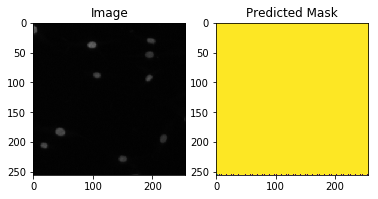

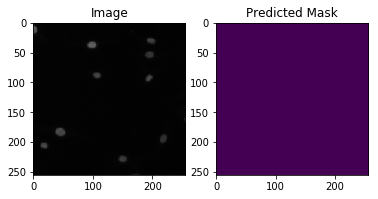

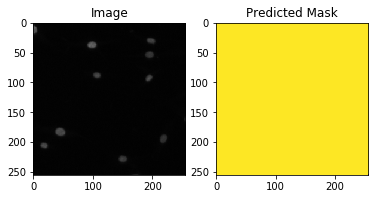

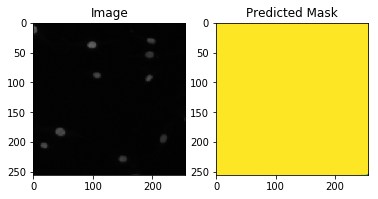

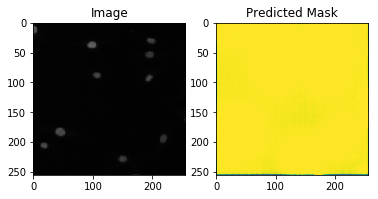

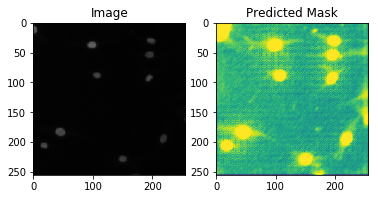

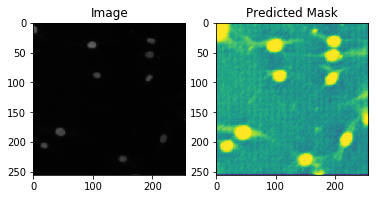

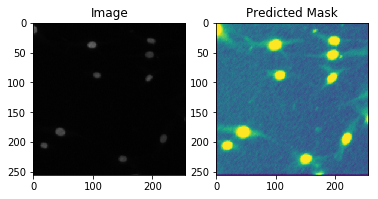

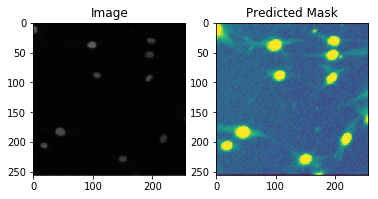

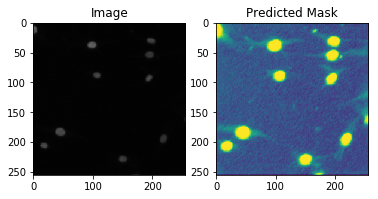

In [13]:
steps=10
epochs=10
#config = tf.ConfigProto()
#config.gpu_options.allow_growth = True
with tf.Session() as sess:
    sess.run(init)
    sess.run(tf.local_variables_initializer())
 
    for e in range(epochs):
        batched_data=get_batch(x_train,y_train,40)
        for i in range(steps):
            batch_x, batch_y= sess.run(batched_data.get_next())
            '''
            print sess.run(tf.shape(batch_x))
            print sess.run(tf.shape(batch_y))
            '''

            sess.run(train,feed_dict={x_:batch_x,y_:batch_y})
            reshaped_y_val=tf.reshape(y_val,[-1,IMG_HEIGHT,IMG_WIDTH,1])
            y_val_imgs=sess.run(reshaped_y_val)
            #print y_val_imgs.shape
            if i%5==0:
                print ("epoch: {}" .format(e))
                print ("training: {}" .format(i*40))
                miou= sess.run(iou, feed_dict={x_:x_val,y_:y_val_imgs})
                print ("mean iou is {}" .format(miou))
        
        reshaped_test=tf.reshape(test_img,[-1,256,256,3])
        n_tst_img=sess.run(reshaped_test)
        pred_img=sess.run(y_pred,feed_dict={x_:n_tst_img})
        rereshp_tf=tf.reshape(pred_img,[256,256])
        predicted_img=sess.run(rereshp_tf)

        fig = plt.figure()
        a=fig.add_subplot(1,2,1)
        imgplot = plt.imshow(test_img)
        a.set_title('Image')
        a=fig.add_subplot(1,2,2)
        imgplot = plt.imshow(predicted_img)
        a.set_title('Predicted Mask')
        
    del batched_data

In [14]:
num=random.randint(0,170)
test_img=cv2.imread(os.path.join(test_dir,test_files[num],'images',test_files[num]+'.png'))
test_img=cv2.resize(test_img,(IMG_HEIGHT,IMG_WIDTH))
reshaped_test=tf.reshape(test_img,[-1,256,256,3])
n_tst_img=sess.run(reshaped_test)
pred_img=sess.run(y_pred,feed_dict={x_:n_tst_img})
rereshp_tf=tf.reshape(pred_img,[256,256])
predicted_img=sess.run(rereshp_tf)

fig = plt.figure()
a=fig.add_subplot(1,2,1)
imgplot = plt.imshow(test_img)
a.set_title('Image')
a=fig.add_subplot(1,2,2)
imgplot = plt.imshow(predicted_img)
a.set_title('Predicted Mask')

RuntimeError: Attempted to use a closed Session.